<a href="https://colab.research.google.com/github/bergmulm/delta/blob/master/tut1_recap_bads_teacher(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the packages from the requirement.txt file:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 13.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.

In [2]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 921.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    

In [3]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import keras as keras
import pandas as pd
import keras_tuner as kt
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import math

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.callbacks import History
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout
from keras import backend as K
from tensorflow.keras import layers, losses
from keras_tuner import HyperParameters as hp
from keras_tuner import RandomSearch
from keras_tuner.tuners import Hyperband


In [4]:
from tensorflow.keras.optimizers.legacy import Adam
from keras.layers import LSTM

In [5]:
# Load the dataset
data = pd.read_csv('Train_Time_Series.csv')

# Display the first few rows of the dataset
print(data.head(5))

   Date             0             1             2             3             4  \
0     0  1.296695e+10  1.457547e+10  1.325288e+09 -2.655211e+10  2.101698e+10   
1     1  1.296838e+10  1.457465e+10  1.328991e+09 -2.655095e+10  2.115096e+10   
2     2  1.305118e+10  1.463240e+10  1.306612e+09 -2.651588e+10  2.114048e+10   
3     3  1.381830e+10  1.516195e+10  1.151668e+09 -2.651554e+10  2.114120e+10   
4     4  1.376322e+10  1.527571e+10  1.281023e+09 -2.670474e+10  2.122595e+10   

              5             6             7             8  ...           311  \
0 -9.094024e+09  4.858148e+09 -2.356104e+09 -3.233936e+10  ... -1.644660e+10   
1 -9.086957e+09  4.913736e+09 -2.354550e+09 -3.234193e+10  ... -1.773644e+10   
2 -9.094517e+09  4.919696e+09 -2.304025e+09 -3.232356e+10  ... -1.761549e+10   
3 -9.052058e+09  4.983555e+09 -1.998877e+09 -3.232600e+10  ... -1.756951e+10   
4 -9.091410e+09  5.032221e+09 -2.144453e+09 -3.253045e+10  ... -1.753090e+10   

            312           313   

In [114]:
data.shape

(2103, 322)

In [115]:
# Load the dataset
test_data = pd.read_csv('Test_Time_Series.csv')

# Display the first few rows of the dataset
print(test_data.head(5))

   Date             0             1             2             3             4  \
0     0  1.555138e+12  1.633847e+12  1.652538e+11 -3.168203e+12  2.508627e+12   
1     1  1.555229e+12  1.637182e+12  1.678976e+11 -3.168150e+12  2.509951e+12   
2     2  1.554766e+12  1.625649e+12  1.851510e+11 -3.168438e+12  2.504698e+12   
3     3  1.555855e+12  1.623798e+12  1.892436e+11 -3.170662e+12  2.492703e+12   
4     4  1.556954e+12  1.624405e+12  1.880460e+11 -3.171289e+12  2.494833e+12   

              5             6             7             8  ...           310  \
0 -1.083380e+12  5.555452e+11 -2.221346e+11 -3.551164e+12  ...  3.137730e+12   
1 -1.084902e+12  5.589830e+11 -2.115863e+11 -3.509191e+12  ...  3.124917e+12   
2 -1.085325e+12  5.607223e+11 -1.930038e+11 -3.490200e+12  ...  3.123452e+12   
3 -1.084008e+12  5.575957e+11 -1.924090e+11 -3.489398e+12  ...  3.124183e+12   
4 -1.075044e+12  5.572082e+11 -2.016911e+11 -3.472119e+12  ...  3.124226e+12   

            311           312   

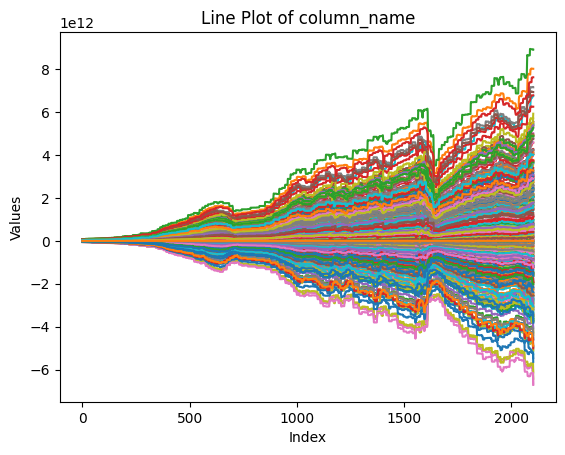

In [111]:
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.title('Line Plot of column_name')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

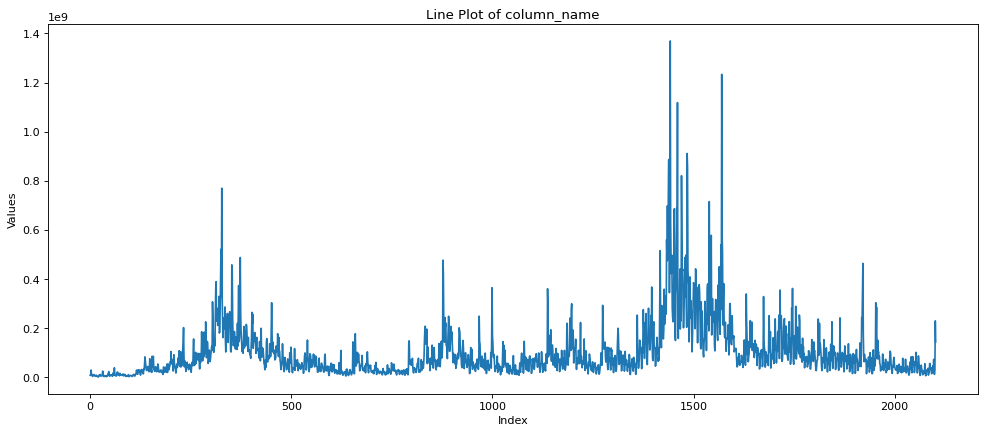

In [8]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(data.index, data['Trading Volume (Target Variable)'], label='Trading Volume (Target Variable)')
plt.title('Line Plot of column_name')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

In [159]:
# Split features and target
X = data.iloc[:, 1:-1].values  # Features (excluding Date and Target Variable)
y = data.iloc[:, -1].values    # Target Variable

In [164]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle = False)

In [165]:
# Feature Scaling
scaler_x = MinMaxScaler()
X_train_scaled= scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

In [166]:
y_train_reshaped = y_train.reshape(-1,1)
y_test_reshaped = y_test.reshape(-1,1)

In [ ]:
scaler_y = MinMaxScaler()
y_train = y_train.reshape(-1,1)
Y_train_scaled = scaler_y.fit_transform(y_train)
y_test = y_test.reshape(-1,1)
Y_test_scaled = scaler_y.transform(y_test)

In [171]:
# Reshape input to be 3D [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [173]:
X_train_reshaped.shape

(1997, 1, 320)

In [169]:
y_train_reshaped

array([[ 7780059.06],
       [ 7454553.8 ],
       [29459968.91],
       ...,
       [15447614.51],
       [46670704.89],
       [41271528.19]])

In [ ]:
std_y = np.std(y_train_reshaped)

In [223]:
std_y

115315060.77484776

In [231]:
y_train_reshaped_div = y_train_reshaped/std_y
y_test_reshaped_div = y_test_reshaped/std_y

In [251]:
# now build the LSTM
model_tuned = Sequential()
model_tuned.add(LSTM(128, input_shape = (X_train_reshaped.shape[1]
                                        , X_train_reshaped.shape[2]),activation='relu'
,return_sequences=True))
#model_tuned.add(LSTM(128, input_shape = (X_train_reshaped.shape[1]
#                                        , X_train_reshaped.shape[2]),activation='relu'
#,return_sequences=True))
model_tuned.add(Dense(1, activation='relu'))

# monitor validation progress
early = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
callbacks_list = [early]

optimizer = keras.optimizers.Adam(0.0001)
model_tuned.compile(loss = 'mean_squared_error',
              optimizer = optimizer,
              metrics = ['mse'])

In [ ]:
128 0,001// 100 50

In [ ]:
history = model_tuned.fit(X_train_reshaped, y_train_reshaped_div,
          batch_size=100, epochs=40,
          validation_data=(X_test_reshaped, y_test_reshaped_div))

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

Epoch 1/40


In [183]:
#Get error of predictions to evaluate it
def print_error(y_train_reshaped, y_test_reshaped, train_predict, test_predict):
    train_predict = train_predict.reshape(-1)
    test_predict = test_predict.reshape(-1)
    train_rmse = math.sqrt(mean_squared_error(y_train_reshaped,train_predict))
    test_rmse = math.sqrt(mean_squared_error(y_test_reshaped, test_predict))
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

In [248]:
train_predict = model_tuned.predict(X_train_reshaped)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [212]:
train_predict

array([[[5.7568752e+07]],

       [[5.7564000e+07]],

       [[5.7569904e+07]],

       ...,

       [[1.5377120e+08]],

       [[1.5360654e+08]],

       [[1.5304043e+08]]], dtype=float32)

In [249]:
test_predict = model_tuned.predict(X_test_reshaped)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [214]:
test_predict

array([[[1.5255797e+08]],

       [[1.5213349e+08]],

       [[1.5181906e+08]],

       [[1.5196410e+08]],

       [[1.5377816e+08]],

       [[1.5401997e+08]],

       [[1.5388050e+08]],

       [[1.5340733e+08]],

       [[1.5311563e+08]],

       [[1.5378605e+08]],

       [[1.5478771e+08]],

       [[1.5514509e+08]],

       [[1.5674846e+08]],

       [[1.5654736e+08]],

       [[1.5667363e+08]],

       [[1.5648864e+08]],

       [[1.5590773e+08]],

       [[1.5527286e+08]],

       [[1.5577808e+08]],

       [[1.5547515e+08]],

       [[1.5519555e+08]],

       [[1.5493706e+08]],

       [[1.5497947e+08]],

       [[1.5484986e+08]],

       [[1.5442293e+08]],

       [[1.5365734e+08]],

       [[1.5347677e+08]],

       [[1.5352374e+08]],

       [[1.5359286e+08]],

       [[1.5360862e+08]],

       [[1.5371630e+08]],

       [[1.5365662e+08]],

       [[1.5357216e+08]],

       [[1.5355085e+08]],

       [[1.5359899e+08]],

       [[1.5358499e+08]],

       [[1.5995816e+08]],

 

In [235]:
#Mean square error
print_error(y_train_reshaped_div, y_test_reshaped_div, train_predict, test_predict)

Train RMSE: 0.794 RMSE
Test RMSE: 0.473 RMSE


In [200]:
#Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

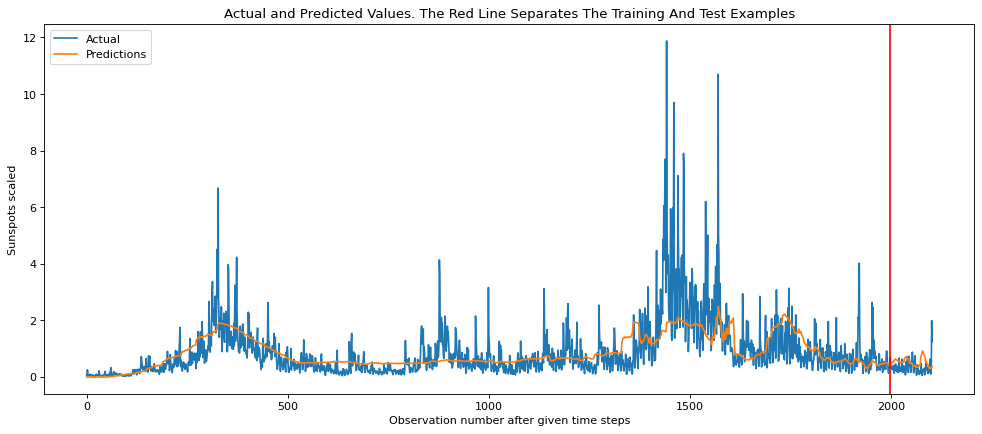

In [250]:
plot_result(y_train_reshaped_div, y_test_reshaped_div, train_predict, test_predict)

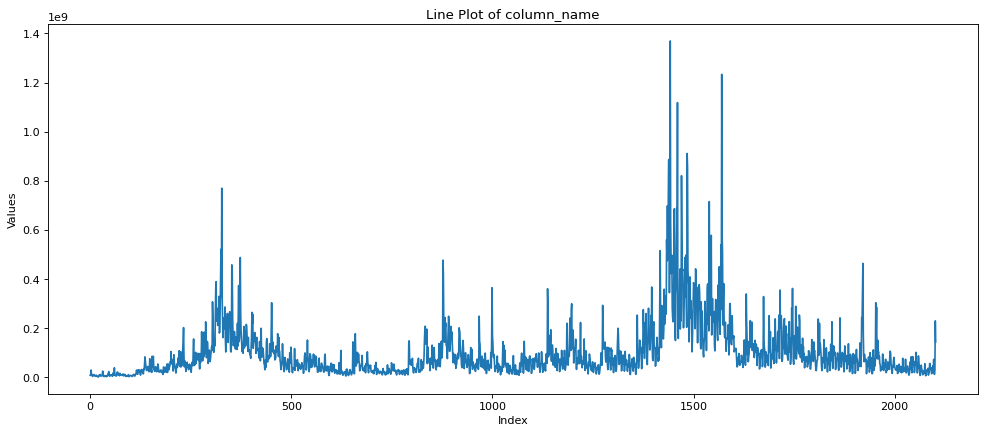

In [198]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(data.index, data['Trading Volume (Target Variable)'], label='Trading Volume (Target Variable)')
plt.title('Line Plot of column_name')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

In [123]:
# Load the dataset
load_test_set = pd.read_csv('Test_Time_Series.csv')

# Display the first few rows of the dataset
print(load_test_set.head(5))
load_test_set.shape

   Date             0             1             2             3             4  \
0     0  1.555138e+12  1.633847e+12  1.652538e+11 -3.168203e+12  2.508627e+12   
1     1  1.555229e+12  1.637182e+12  1.678976e+11 -3.168150e+12  2.509951e+12   
2     2  1.554766e+12  1.625649e+12  1.851510e+11 -3.168438e+12  2.504698e+12   
3     3  1.555855e+12  1.623798e+12  1.892436e+11 -3.170662e+12  2.492703e+12   
4     4  1.556954e+12  1.624405e+12  1.880460e+11 -3.171289e+12  2.494833e+12   

              5             6             7             8  ...           310  \
0 -1.083380e+12  5.555452e+11 -2.221346e+11 -3.551164e+12  ...  3.137730e+12   
1 -1.084902e+12  5.589830e+11 -2.115863e+11 -3.509191e+12  ...  3.124917e+12   
2 -1.085325e+12  5.607223e+11 -1.930038e+11 -3.490200e+12  ...  3.123452e+12   
3 -1.084008e+12  5.575957e+11 -1.924090e+11 -3.489398e+12  ...  3.124183e+12   
4 -1.075044e+12  5.572082e+11 -2.016911e+11 -3.472119e+12  ...  3.124226e+12   

            311           312   

(395, 321)

In [124]:
test_set = load_test_set.iloc[:, 1:].values  # Features (excluding Date)

In [125]:
test_set_scaled.shape

(395, 320)

In [126]:
scaler = MinMaxScaler()
test_set_scaled= scaler.fit_transform(test_set)

In [127]:
test_set_scaled

array([[0.07455118, 0.03331598, 0.24478097, ..., 0.21027761, 0.05677339,
        0.85890224],
       [0.07461079, 0.03525298, 0.25893321, ..., 0.17845406, 0.05613758,
        0.85909202],
       [0.07430934, 0.02855505, 0.35128812, ..., 0.16718981, 0.0549594 ,
        0.85859179],
       ...,
       [0.94928548, 0.97929621, 0.83659354, ..., 0.99571646, 0.99954893,
        0.09754194],
       [0.95038557, 0.97935389, 0.83533251, ..., 0.99380207, 0.99853456,
        0.09528188],
       [0.98389846, 1.        , 0.78038099, ..., 1.        , 1.        ,
        0.0912496 ]])

In [128]:
test_set_reshaped = test_set.reshape((test_set.shape[0], 1, test_set.shape[1]))

In [129]:
test_set_reshaped.shape

(395, 1, 320)

In [132]:
test_set_reshaped

array([[[ 1.5551376e+12,  1.6338466e+12,  1.6525376e+11, ...,
          6.9842690e+11,  3.9520753e+12, -2.5162094e+12]],

       [[ 1.5552293e+12,  1.6371817e+12,  1.6789763e+11, ...,
          6.7409530e+11,  3.9494190e+12, -2.5157410e+12]],

       [[ 1.5547656e+12,  1.6256493e+12,  1.8515105e+11, ...,
          6.6548290e+11,  3.9444968e+12, -2.5169756e+12]],

       ...,

       [[ 2.9006818e+12,  3.2626225e+12,  2.7581410e+11, ...,
          1.2989564e+12,  7.8908065e+12, -4.3953050e+12]],

       [[ 2.9023740e+12,  3.2627218e+12,  2.7557852e+11, ...,
          1.2974927e+12,  7.8865687e+12, -4.4008830e+12]],

       [[ 2.9539246e+12,  3.2982700e+12,  2.6531267e+11, ...,
          1.3022315e+12,  7.8926910e+12, -4.4108350e+12]]])

In [133]:
test_set_predict = model_tuned.predict(test_set_reshaped)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [131]:
test_set_predict

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


NameError: name 'length' is not defined

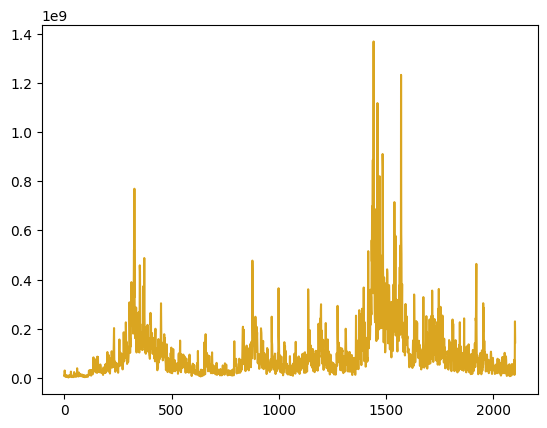

In [ ]:
# get predictions
train_predictions = model.predict(X_train_reshaped)
test_predictions = model.predict(X_test_reshaped)

# plot predictions vs actual
plt.plot(data['Date'],
    data['Trading Volume (Target Variable)'], c = 'goldenrod', label = 'data')
plt.plot(data.iloc[(length+1):-test_size]['Date'],
    train_predictions, c = 'navy', label = 'train')
plt.plot(data.iloc[-test_size:]['Date'],
    test_predictions, c = 'firebrick', label = 'test')
plt.legend(loc='best')
plt.show()

In [ ]:
param_grid = dict(batch_size=[50,75,100,125], epochs=[100,200,300,400])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_reshaped, Y_train_scaled)
#history = model.fit(X_train_reshaped, Y_train_scaled,
          #batch_size=50, epochs=150,
          #validation_data=(X_test_reshaped, Y_test_scaled))

# plot history
#plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='val')
#plt.ylim(0,2)
#plt.legend()
#plt.show()

In [ ]:
plt.plot(grid_result.history['loss'], label='train')
plt.plot(grid_result.history['val_loss'], label='val')
plt.ylim(0,2)
plt.legend()
plt.show()

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(SimpleRNN(128, input_shape=(X_train_reshaped.shape[1]
                                        , X_train_reshaped.shape[2])))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units_1', min_value=32, max_value=512, step=32)
  model.add(Dense(units=hp_units, activation='relu'))
  hp_units2 = hp.Int('units_2', min_value=32, max_value=512, step=32)
  model.add(Dense(units=hp_units2, activation='relu'))
  hp_units3 = hp.Int('units_3', min_value=32, max_value=512, step=32)
  model.add(Dense(units=hp_units3, activation='relu'))
  model.add(Dense(1, activation='linear'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 5e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.MeanSquaredError,
                metrics=['accuracy'])

  return model


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units_1'),best_hps.get('units_2'),best_hps.get('units_3'), } and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is (256, 512, 128) and the optimal learning rate for the optimizer
is 0.005.



In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     overwrite=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
tuner.search(X_train_reshaped, Y_train_scaled, epochs=50, validation_split=0.2, callbacks=[stop_early])

Trial 23 Complete [00h 00m 10s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 03m 09s

Search: Running Trial #24

Value             |Best Value So Far |Hyperparameter
320               |256               |units_1
256               |512               |units_2
384               |128               |units_3
0.005             |0.005             |learning_rate
4                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/4


In [ ]:
# now build the LSTM
model_tuned = Sequential()
model_tuned.add(LSTM(128, input_shape = (X_train_reshaped.shape[1]
                                        , X_train_reshaped.shape[2])
, activation = 'relu'))
model_tuned.add(Dense(1, activation='linear'))

# monitor validation progress
early = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
callbacks_list = [early]

optimizer = keras.optimizers.Adam(0.01)
model_tuned.compile(loss = 'mean_squared_error',
              optimizer = optimizer,
              metrics = ['mse'])

In [138]:
X.shape

(2103, 320)

In [96]:
X_train_scaled = X_train
X_test_scaled = X_test

y_train = y_train.reshape(-1,1)
Y_train_scaled = y_train
y_test = y_test.reshape(-1,1)
Y_test_scaled = y_test

In [141]:
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))
y_reshaped = y.reshape(-1,1)

In [142]:
y_reshaped.shape

(2103, 1)

In [143]:
X_reshaped.shape

(2103, 1, 320)